<center><h1>Data Acquisition</h1></center>
<hr/>

#### Imports

In [217]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Data processing

In [289]:
path = "data/100_short_stories/"
data_files = [path + file for file in sorted(os.listdir(path))]

In [290]:
text_files, ann_files = [], []
for file in data_files:
    if file[-4:] == '.ann':
        ann_files.append(file)
    else:
        text_files.append(file)

In [291]:
stories = []

for text_file in text_files:
    with open(text_file, 'r') as file:
        stories.append(".".join(file.readlines()))

In [292]:
stories[0]

'CHAPTER I In Chancery London .\n.Michaelmas term lately over , and the Lord Chancellor sitting in Lincoln \'s Inn Hall .\n.Implacable November weather .\n.As much mud in the streets as if the waters had but newly retired from the face of the earth , and it would not be wonderful to meet a Megalosaurus , forty feet long or so , waddling like an elephantine lizard up Holborn Hill .\n.Smoke lowering down from chimney-pots , making a soft black drizzle , with flakes of soot in it as big as full-grown snowflakes -- gone into mourning , one might imagine , for the death of the sun .\n.Dogs , undistinguishable in mire .\n.Horses , scarcely better ; splashed to their very blinkers .\n.Foot passengers , jostling one another \'s umbrellas in a general infection of ill temper , and losing their foot-hold at street-corners , where tens of thousands of other foot passengers have been slipping and sliding since the day broke ( if this day ever broke ) , adding new deposits to the crust upon crust o

In [293]:
annotations = []

for ann_file in ann_files:
    anns = []
    with open (ann_file, 'r') as file:
        for line in file.readlines():
            ann = line.split("\t")
            type, loc1, loc2 = ann[1].split()
            anns.append([ann[0], type, int(loc1), int(loc2), ann[-1].strip()])
    annotations.append(anns)

In [294]:
annotations[0][:10]

[['T2', 'FAC', 96, 115, "Lincoln 's Inn Hall"],
 ['T3', 'LOC', 361, 373, 'Holborn Hill'],
 ['T4', 'FAC', 163, 174, 'the streets'],
 ['T6', 'LOC', 1143, 1153, 'green aits'],
 ['T7', 'LOC', 1158, 1165, 'meadows'],
 ['T8', 'GPE', 1312, 1317, 'Essex'],
 ['T9', 'VEH', 1465, 1476, 'great ships'],
 ['T11', 'FAC', 1627, 1638, 'their wards'],
 ['T13', 'PER', 1785, 1820, "his shivering little ' prentice boy"],
 ['T14', 'PER', 1691, 1711, 'the wrathful skipper']]

In [295]:
len(stories), len(annotations)

(100, 100)

In [296]:
df = pd.DataFrame([(story, ann) for story, ann in zip(stories, annotations)], columns = ["Stories", "Annotations"])

In [297]:
df

,Stories,Annotations
0,CHAPTER I In Chancery London .\n.Michaelmas te...,"[[T2, FAC, 96, 115, Lincoln 's Inn Hall], [T3,..."
1,"Chapter 1 Sir Walter Elliot , of Kellynch Hall...","[[T0, FAC, 33, 46, Kellynch Hall], [T2, GPE, 8..."
2,"The "" Red Death "" had long devastated the coun...","[[T1, PER, 355, 365, the victim], [T3, PER, 75..."
3,Phase the First : The Maiden I On an evening i...,"[[T0, PER, 71, 88, a middle-aged man], [T1, GP..."
4,I am a rather elderly man .\n.The nature of my...,"[[T0, PER, 5, 25, a rather elderly man], [T1, ..."
...,...,...
95,"CHAPTER 1 “ Mine ear is open , and my heart pr...","[[T1, PER, 288, 305, the adverse hosts], [T2, ..."
96,CHAPTER 1 The Rassendylls -- With a Word on th...,"[[T1, PER, 134, 152, my brother ’s wife], [T3,..."
97,CHAPTER I You must go back with me to the autu...,"[[T1, PER, 99, 115, gentleman farmer], [T3, PE..."
98,"CHAPTER I Mr Verloc , going out in the morning...","[[T1, PER, 304, 312, his wife], [T2, GPE, 513,..."


In [298]:
df.to_csv("data/processed_stories.csv")

#### Statistics

In [299]:
tags = {}

for annotations in df.Annotations:
    for annotation in annotations:
        if annotation[1] in tags:
            tags[annotation[1]] += 1
        else:
            tags[annotation[1]] = 1

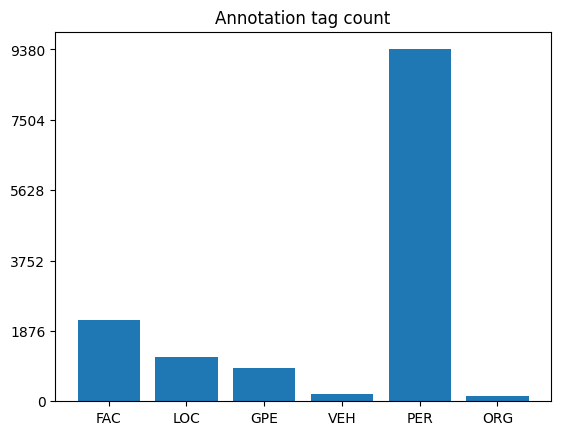

In [300]:
plt.figure()

plt.bar(tags.keys(), tags.values())
plt.yticks(range(0, max(tags.values()), (max(tags.values())//5)))
plt.title("Annotation tag count")
plt.show()

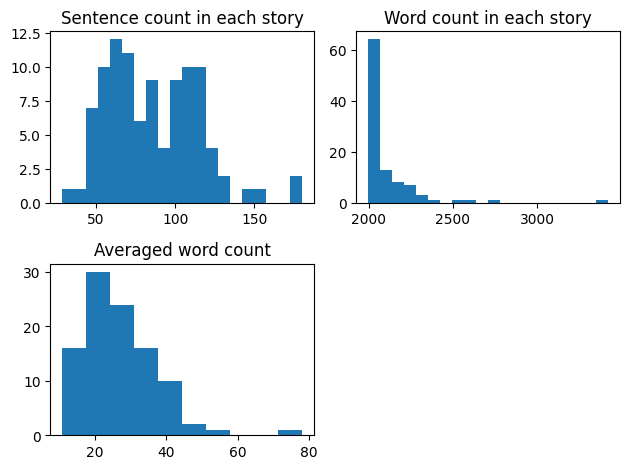

In [322]:
fig, ((ax11, ax12), (ax21, ax22)) = plt.subplots(2, 2)

ax11.hist([len(sentences) for sentences in df.Stories.str.split("\n")], bins=20)
ax11.set_title("Sentence count in each story")

ax12.hist([len(word) for word in df.Stories.str.split()], bins=20)
ax12.set_title("Word count in each story")

# Word count in each sentence averaged for each story
ax21.hist([round(np.mean([len(sentence.split()) for sentence in sentences])) for sentences in df.Stories.str.split("\n")])
ax21.set_title("Averaged word count")

ax22.remove()
plt.tight_layout()
plt.show()